### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
import os
import random
import glob
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import (Dense, 
                                     BatchNormalization, 
                                     LeakyReLU, 
                                     Reshape, 
                                     MaxPooling2D,
                                     Conv2DTranspose,
                                     Conv2D,
                                     Dropout,
                                     Flatten)

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import RandomUniform

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,image_ID,label
0,7c225f7b61.jpg,Badminton
1,b31.jpg,Badminton
2,acb146546c.jpg,Badminton
3,0e62f4d8f2.jpg,Badminton
4,cfd2c28c74.jpg,Cricket
...,...,...
8222,903d2fffb3.jpg,Cricket
8223,b5f174c688.jpg,Badminton
8224,2433770a67.jpg,Tennis
8225,6403964166.jpg,Tennis


In [4]:
train['label'].unique()

array(['Badminton', 'Cricket', 'Tennis', 'Swimming', 'Soccer',
       'Wrestling', 'Karate'], dtype=object)

In [5]:
train['label'].value_counts()

Cricket      1556
Wrestling    1471
Tennis       1445
Badminton    1394
Soccer       1188
Swimming      595
Karate        578
Name: label, dtype: int64

### Loading datasets

In [6]:
#Defining function for loading images from folder

def load_images_from_folder(folder):
    images = []
    names = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            names.append(filename)
    return images,names

In [7]:
train_data,train_label=load_images_from_folder(r'D:\Personal Projects\PGP GLASS HACKEREARTH\train')

In [8]:
len(train_label)

8227

In [9]:
a = np.arange(1,8228,1)
a

array([   1,    2,    3, ..., 8225, 8226, 8227])

In [10]:
len(a)

8227

In [11]:
train = train.replace(train_label,a)

In [12]:
train = train.set_index('image_ID')

In [13]:
train

,label
image_ID,
3791,Badminton
5554,Badminton
5347,Badminton
418,Badminton
6717,Cricket
...,...
4452,Cricket
5652,Badminton
1068,Tennis


In [14]:
train_y = train.sort_index()

In [15]:
train_y

,label
image_ID,
1,Tennis
2,Swimming
3,Swimming
4,Cricket
5,Soccer
...,...
8223,Wrestling
8224,Cricket
8225,Tennis


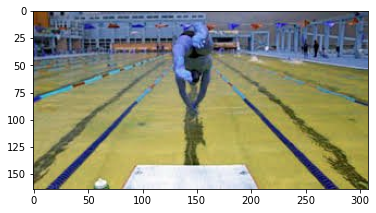

In [16]:
plt.imshow(train_data[1])

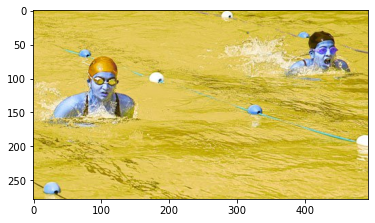

In [17]:
plt.imshow(train_data[2])

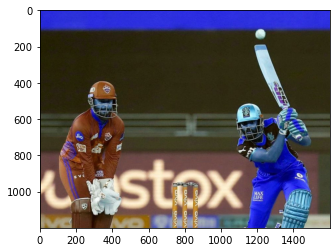

In [18]:
plt.imshow(train_data[3])

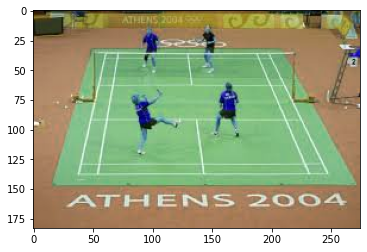

In [19]:
plt.imshow(train_data[8225])

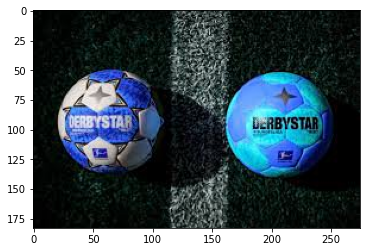

In [20]:
plt.imshow(train_data[4])

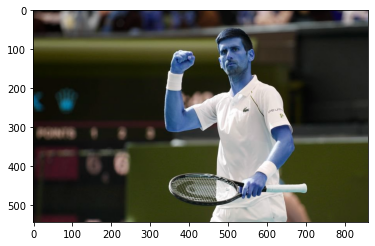

In [21]:
plt.imshow(train_data[0])

### Resizing all the images to 64 X 64

In [22]:
# train = np.array(train_data)

In [23]:
type(train_data[0])

numpy.ndarray

In [24]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (64, 64)) # Resizing the image to 224x224 dimention
    return (image)

In [25]:
for i in range(8227):
    train_data[i]=scale_resize_image(train_data[i])

In [26]:
train_data[1].shape

TensorShape([64, 64, 3])

In [27]:
train_data[1000].shape

TensorShape([64, 64, 3])

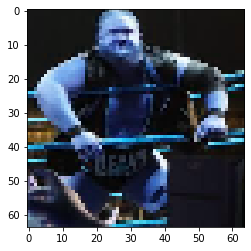

In [28]:
plt.imshow(train_data[11])

### Visualization of some images

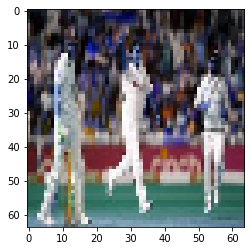

In [29]:
# perform visualization
i = np.random.randint(1, len(train_data))
plt.imshow(train_data[i])
# y_train[i]

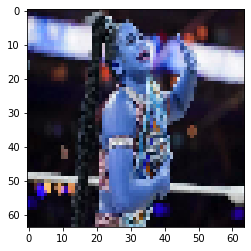

In [30]:
# perform visualization
i = np.random.randint(1, len(train_data))
plt.imshow(train_data[i])
# y_train[i]

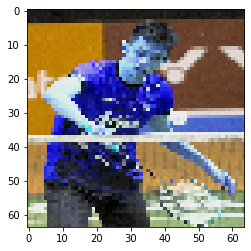

In [31]:
# perform visualization
i = np.random.randint(1, len(train_data))
plt.imshow(train_data[i])
# y_train[i]

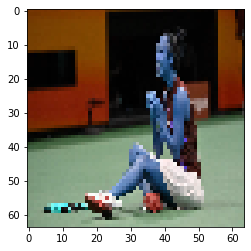

In [32]:
# perform visualization
i = np.random.randint(1, len(train_data))
plt.imshow(train_data[i])
# y_train[i]

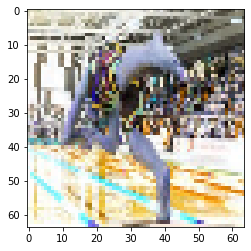

In [33]:
# perform visualization
i = np.random.randint(1, len(train_data))
plt.imshow(train_data[i])
# y_train[i]

In [34]:
# # perform visualization
# i = np.random.randint(1, len(train))
# plt.imshow(train[i])
# y_train[i]

In [35]:
train_data[1].shape

TensorShape([64, 64, 3])

In [36]:
train_data[2].shape

TensorShape([64, 64, 3])

In [37]:
train_data[3].shape

TensorShape([64, 64, 3])

In [38]:
train_data[4].shape

TensorShape([64, 64, 3])

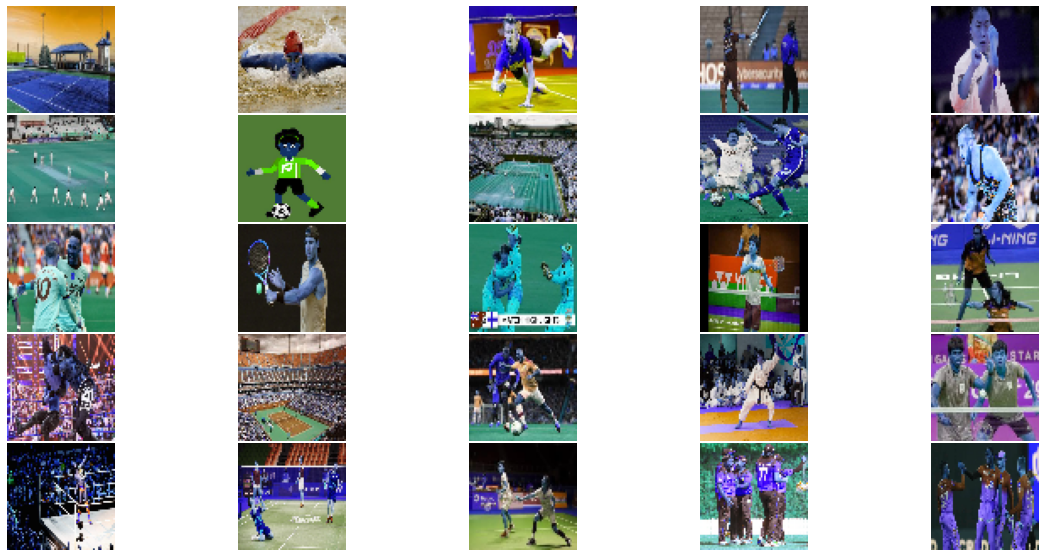

In [39]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(train_data) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,L_grid*W_grid):
    
    # Select a random number
    index = np.random.randint(0,n_training)
    # read and display an image with the selected index    
    axes[i].imshow(train_data[index])
#     axes[i].set_title(label[index],fontsize=15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.02)   

In [40]:
len(train_data)

8227

In [41]:
ml_data = np.empty([8227,64,64,3])

In [42]:
for i in range(8227):
    ml_data[i,:,:,:] = train_data[i]

In [43]:
ml_data.shape

(8227, 64, 64, 3)

### Model architecture

In [44]:

# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load model without classifier layers
model = VGG16(include_top=False, input_shape=(64, 64, 3))
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# summarize
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [45]:
adam = Adam(learning_rate=1e-04)

In [46]:
model.compile(optimizer='Adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
train_y['label'] = le.fit_transform(train_y['label'])

In [49]:
history = model.fit(ml_data,
                 train_y['label'],
                 epochs=10,
                 verbose=1,
                 shuffle = True,
                 validation_split=0.1
                 )

Epoch 1/10
232/232 [==============================] - 1221s 5s/step - loss: 1.8751 - accuracy: 0.2189 - val_loss: 1.6804 - val_accuracy: 0.2819
Epoch 2/10
232/232 [==============================] - 462s 2s/step - loss: 1.6182 - accuracy: 0.3464 - val_loss: 1.6227 - val_accuracy: 0.3633
Epoch 3/10
232/232 [==============================] - 442s 2s/step - loss: 1.4351 - accuracy: 0.4603 - val_loss: 1.4982 - val_accuracy: 0.4447
Epoch 4/10
232/232 [==============================] - 440s 2s/step - loss: 1.3866 - accuracy: 0.4822 - val_loss: 1.2972 - val_accuracy: 0.5541
Epoch 5/10
232/232 [==============================] - 441s 2s/step - loss: 1.3265 - accuracy: 0.5092 - val_loss: 1.2916 - val_accuracy: 0.5225
Epoch 6/10
232/232 [==============================] - 446s 2s/step - loss: 1.2155 - accuracy: 0.5606 - val_loss: 1.1535 - val_accuracy: 0.5820
Epoch 7/10
232/232 [==============================] - 441s 2s/step - loss: 1.1732 - accuracy: 0.5847 - val_loss: 1.1191 - val_accuracy: 0.608

In [52]:
history = model.fit(ml_data,
                 train_y['label'],
                 epochs=5,
                 verbose=1,
                 shuffle = True,
                 validation_split=0.1
                 )

Epoch 1/5
232/232 [==============================] - 434s 2s/step - loss: 0.8878 - accuracy: 0.6953 - val_loss: 0.9798 - val_accuracy: 0.6829
Epoch 2/5
232/232 [==============================] - 434s 2s/step - loss: 0.8169 - accuracy: 0.7189 - val_loss: 0.9131 - val_accuracy: 0.6926
Epoch 3/5
232/232 [==============================] - 425s 2s/step - loss: 0.7406 - accuracy: 0.7520 - val_loss: 0.9079 - val_accuracy: 0.6987
Epoch 4/5
232/232 [==============================] - 426s 2s/step - loss: 0.7000 - accuracy: 0.7636 - val_loss: 0.7919 - val_accuracy: 0.7363
Epoch 5/5
232/232 [==============================] - 429s 2s/step - loss: 0.6278 - accuracy: 0.7931 - val_loss: 0.7648 - val_accuracy: 0.7412


In [53]:
model.save('vgg_model')

INFO:tensorflow:Assets written to: vgg_model\assets


In [54]:
train_y['label'].value_counts()

1    1556
6    1471
5    1445
0    1394
3    1188
4     595
2     578
Name: label, dtype: int64